## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/rtide/

/content/drive/My Drive/rtide


In [3]:
!pip install utide

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.2/75.2 kB 572.3 kB/s eta 0:00:00


In [4]:
!pip install skyfield

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 473.5 kB/s eta 0:00:00


In [5]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.7 MB/s eta 0:00:00


### Constants:

In [6]:
### Synthetic data based off of the tides at Easport, ME, USA

constits = ['M2', 'N2', 'S2', 'L2', 'K1', 'NU2', 'O1', 'K2', '2N2', 'M4',
       'LDA2', 'P1', 'M6', '2MN6', 'SSA', 'MM', 'MN4', '2MS6', 'Q1',
       'MS4', 'OQ2', 'MF', 'EPS2', 'NO1', 'MU2', 'MSF', 'MSN2', 'MKS2',
       'MSM', 'TAU1', 'CHI1', '2MK6', 'SIG1', 'M8', '2Q1', 'ALP1', 'J1',
       'MK3', 'OO1', 'RHO1', 'MO3', 'THE1', 'ETA2', 'MK4', 'M3', 'PHI1',
       'SO1', 'MSK6', '2SM6', '2MK5', '2SK5', 'SO3', 'SK4', 'S4', 'SN4',
       'UPS1', 'SK3', '3MK7', 'BET1']

constit_freqs = [8.05114007e-02, 7.89992487e-02, 8.33333333e-02, 8.20235526e-02,
       4.17807462e-02, 7.92016200e-02, 3.87306545e-02, 8.35614924e-02,
       7.74870967e-02, 1.61022801e-01, 8.18211814e-02, 4.15525871e-02,
       2.41534202e-01, 2.40022050e-01, 2.28159110e-04, 1.51215197e-03,
       1.59510649e-01, 2.44356135e-01, 3.72185025e-02, 1.63844734e-01,
       7.59749448e-02, 3.05009177e-03, 7.61773160e-02, 4.02685942e-02,
       7.76894680e-02, 2.82193266e-03, 8.48454853e-02, 8.07395598e-02,
       1.30978069e-03, 3.89588136e-02, 4.04709655e-02, 2.44584294e-01,
       3.59087218e-02, 3.22045603e-01, 3.57063505e-02, 3.43965698e-02,
       4.32928982e-02, 1.22292147e-01, 4.48308380e-02, 3.74208738e-02,
       1.19242055e-01, 4.30905269e-02, 8.50736444e-02, 1.64072893e-01,
       1.20767101e-01, 4.20089053e-02, 4.46026789e-02, 2.47406226e-01,
       2.47178067e-01, 2.02803548e-01, 2.08447413e-01, 1.22063988e-01,
       1.66894826e-01, 1.66666667e-01, 1.62332582e-01, 4.63429900e-02,
       1.25114080e-01, 2.83314948e-01, 4.00404351e-02]

amplitudes = [2.69536915e+00, 5.72051193e-01, 4.07506583e-01, 1.77388101e-01,
       1.47556429e-01, 1.19429297e-01, 1.09452258e-01, 1.04476023e-01,
       8.61191165e-02, 6.23530012e-02, 5.25568128e-02, 5.24018291e-02,
       5.19452145e-02, 3.00794037e-02, 2.84902243e-02, 2.43228739e-02,
       2.36208636e-02, 2.23206826e-02, 2.16932828e-02, 1.69515192e-02,
       1.59876603e-02, 1.55192273e-02, 1.39270008e-02, 1.31075437e-02,
       1.16664290e-02, 1.12614002e-02, 1.00992138e-02, 9.90031008e-03,
       9.78086103e-03, 6.67196947e-03, 6.30213718e-03, 6.03839327e-03,
       5.79057561e-03, 5.58555813e-03, 5.53185602e-03, 5.09334554e-03,
       4.94360009e-03, 4.20564738e-03, 3.95227210e-03, 3.94934833e-03,
       3.89841590e-03, 3.89051376e-03, 3.83732293e-03, 3.53288437e-03,
       2.81478065e-03, 2.33707655e-03, 2.24773556e-03, 2.01115802e-03,
       1.60006625e-03, 1.42035014e-03, 1.25888117e-03, 1.21582618e-03,
       1.15983346e-03, 1.13589867e-03, 7.27191018e-04, 5.66714794e-04,
       4.59664834e-04, 4.42728050e-04, 3.61904833e-04]

phases = [100.17759146,  67.89243773, 139.00250991, 137.86574464,
       200.97272826,  74.79464737, 165.69341288, 153.88678437,
        58.36570311,  89.0912145 , 127.98741436, 191.68500006,
       278.47737423, 244.0325824 , 177.04405382,  44.34332198,
        52.25904325, 323.89847841, 133.57991772, 136.30167208,
        28.30723094, 217.33413263, 126.53992866, 161.0469261 ,
       174.82541658,  15.58408105,   7.47832655,  31.42622825,
        97.44531604,  99.02486302,  68.17868939, 330.05943051,
       150.29924914, 251.95764691, 210.86869631,   7.60600294,
       230.66692903,  69.11247392, 271.44019503,  86.11567323,
       339.08199382, 158.8889673 ,  35.15053441, 133.53233952,
       257.70571862,   5.82066898, 106.55105815,  20.09288806,
         6.71678559, 332.8022366 ,  84.89100071,  26.87074928,
       195.77759826, 285.62386608, 303.69083469, 319.58250059,
        45.59421571,   9.39030707, 156.23344292]

#### MODIFYING THINGS

## Generating A Synthetic Tidal Signal:

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
### Producing a 1-year reference series sampled at 6' intervals
times = pd.date_range(start = '2024-01-01 00:00:00+00:00', periods=24*365, freq="1H",tz='UTC')
time_vals = times.to_julian_date().to_numpy()

### Computing the contribution of each constituent
individual_tides = []
for i,j in enumerate(constit_freqs):
    individual_tides.append(amplitudes[i]*np.cos(24*j*np.array(time_vals) * 2 * np.pi + (phases[i] *np.pi /180)))

### Calculating the final tide as the superposition of all constituents for each time instance
tide = np.sum(individual_tides, axis = 0) + 0.1*np.random.normal(len(individual_tides))

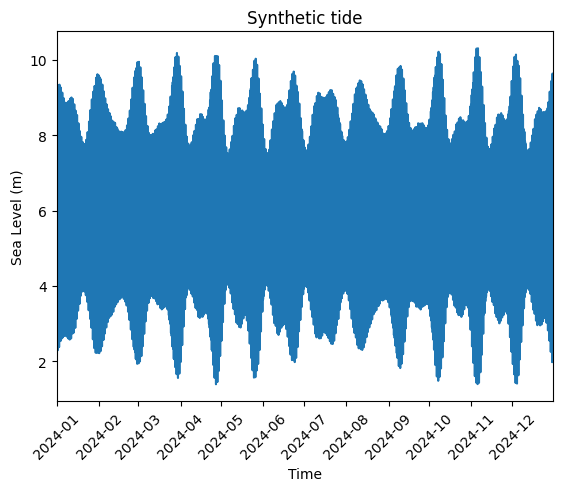

In [63]:
### We have a tidal signal!
plt.plot(times, tide)
plt.xlim(times[0], times[-1])
plt.title('Synthetic tide')
plt.xlabel('Time')
plt.ylabel('Sea Level (m)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Simple Application of RTide

RTide can be run using three lines of code. By default, RTide takes pandas dataframes with date-time indexes as input and measurements provided in a column labeled 'observations'. It is best practice to use frequency aware indexes.

In addition to the observations dataframe, RTide also requires the latitude, longitude.

To remove the need to recompute the global tide function in between runs, a file name should be specified to save the computed input functions, inputs, and trained model. An Rtide saves folder will automatically be added to the directory to prevent excess clutter.

In [54]:
import rtide
from rtide import RTide

In [64]:
df = pd.DataFrame({'observations': tide}, index = times)

In [66]:
model = RTide(df[:7000], lat = 44.9062, lon = -66.996201)

inputs = {
          'symmetrical': True,
          'path': 'demo'
}
model.Prepare_Inputs(**inputs)

Input function path either has not specified, has not yet been computed, or different inputs were provided. Computing now...
Actual error was [Errno 2] No such file or directory: './rtide_saves/demo_global_tide.csv'


100%|██████████| 7300/7300 [02:09<00:00, 56.52it/s]


#### Model Overview ####
Learning Rate: 0.0001
Loss: MSE
Linear Epochs: 0
Standard Epochs: 500
Regularization: 0.0
Number of Layers: 3
Multi: False
Save Weights: True
Epoch 1/500
186/186 - 2s - loss: 0.8281 - val_loss: 0.1866 - lr: 1.0000e-04 - 2s/epoch - 9ms/step
Epoch 2/500
186/186 - 1s - loss: 0.1371 - val_loss: 0.0883 - lr: 1.0000e-04 - 579ms/epoch - 3ms/step
Epoch 3/500
186/186 - 1s - loss: 0.0824 - val_loss: 0.0623 - lr: 1.0000e-04 - 1s/epoch - 6ms/step
Epoch 4/500
186/186 - 1s - loss: 0.0581 - val_loss: 0.0461 - lr: 1.0000e-04 - 944ms/epoch - 5ms/step
Epoch 5/500
186/186 - 1s - loss: 0.0426 - val_loss: 0.0356 - lr: 1.0000e-04 - 920ms/epoch - 5ms/step
Epoch 6/500
186/186 - 1s - loss: 0.0369 - val_loss: 0.0298 - lr: 1.0000e-04 - 1s/epoch - 7ms/step
Epoch 7/500
186/186 - 1s - loss: 0.0305 - val_loss: 0.0302 - lr: 1.0000e-04 - 997ms/epoch - 5ms/step
Epoch 8/500
186/186 - 1s - loss: 0.0229 - val_loss: 0.0193 - lr: 1.0000e-04 - 615ms/epoch - 3ms/step
Epoch 9/500
186/186 - 1s - loss: 0

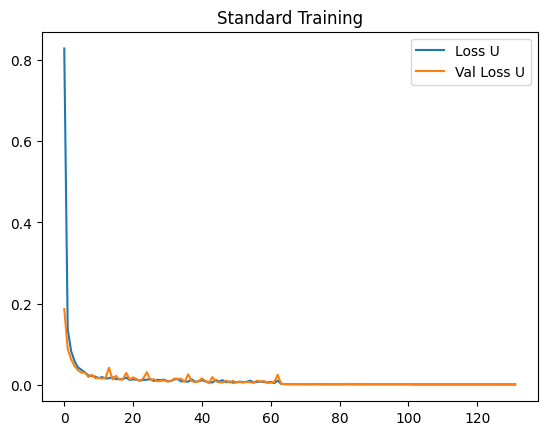

219/219 [==============================] - 0s 2ms/step


In [67]:
train_inputs = {
    'loss' : 'MSE',
    'save_weights' : True,
    'lr':1e-4,
    'standard_epochs': 500,
    'early_stoppage':30
}
model.Train(**train_inputs)

### Let's look at the train results:

Unsurprisingly, when dealing with a purely harmonic signal HA is going to be hard to beat...
This exposes a crucial distinction between these methods. Because RTide is not composed of harmonics it can only get $\epsilon$ close to a truly harmonic function. However, this same characteristic enables RTide to use less data and more efficiently be applied to non-stationary data. Equivalent harmonic predictions are also simultaneously computed and included in the results.


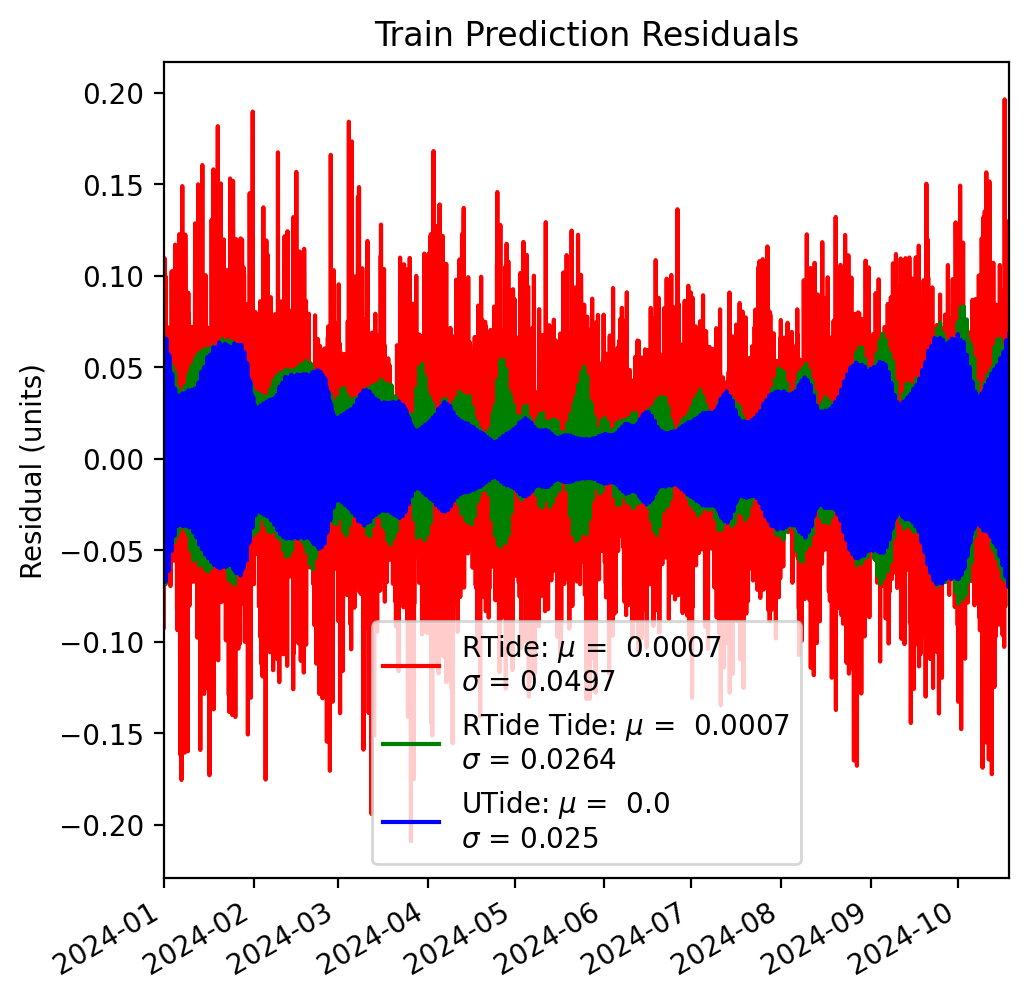

In [58]:
model.Visualize_Residuals(tides = True)

Train Results
r2: 0.9992242239532262 MSE: 0.003062520679897179 MAE : 0.04334833548071049 MAPE : 0.14528238016353742


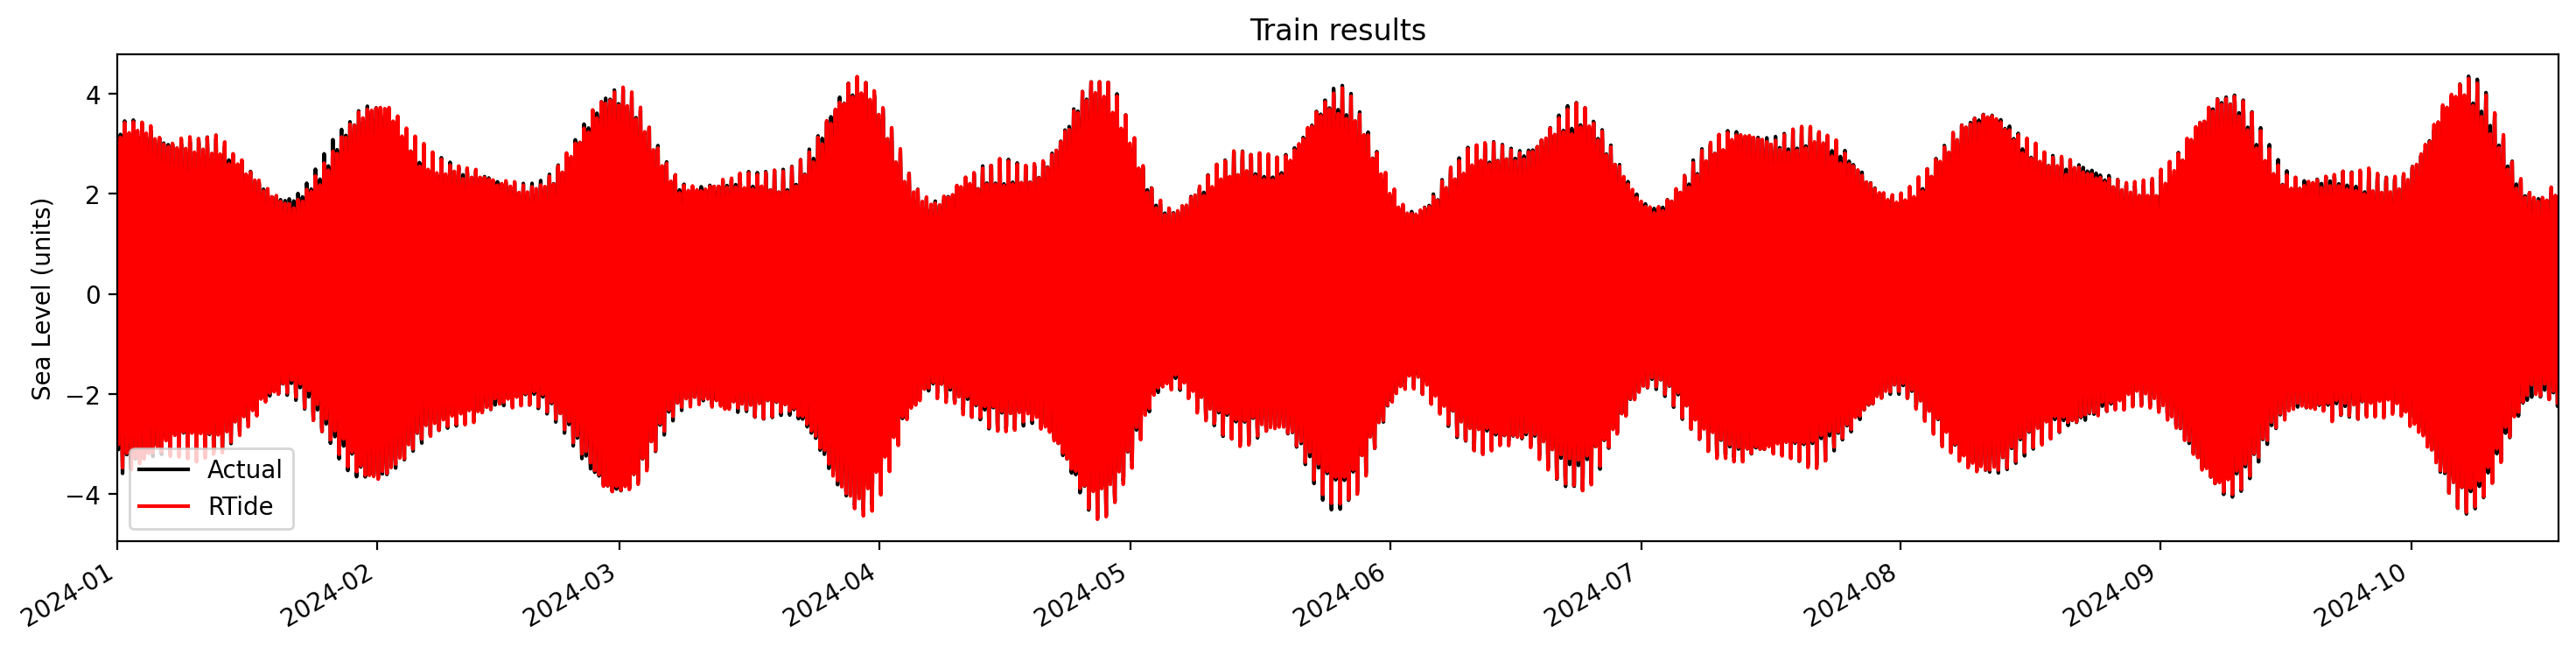

In [16]:
model.Visualize_Predictions()

### Now let's generate some out of sample predictions and look at the results:

Note that the visualize residuals/predictions functions will automatically plot whatever data is available. e.g. if you only generate predictions from a pre-trained model it will only show predictions.

In [17]:
model.Predict(df[7000:])

Computing input functions for prediction
Input function path either has not specified, has not yet been computed, or different inputs were provided. Computing now...
Actual error was exceptions must derive from BaseException


100%|██████████| 2060/2060 [00:42<00:00, 47.98it/s]


55/55 [==============================] - 0s 2ms/step


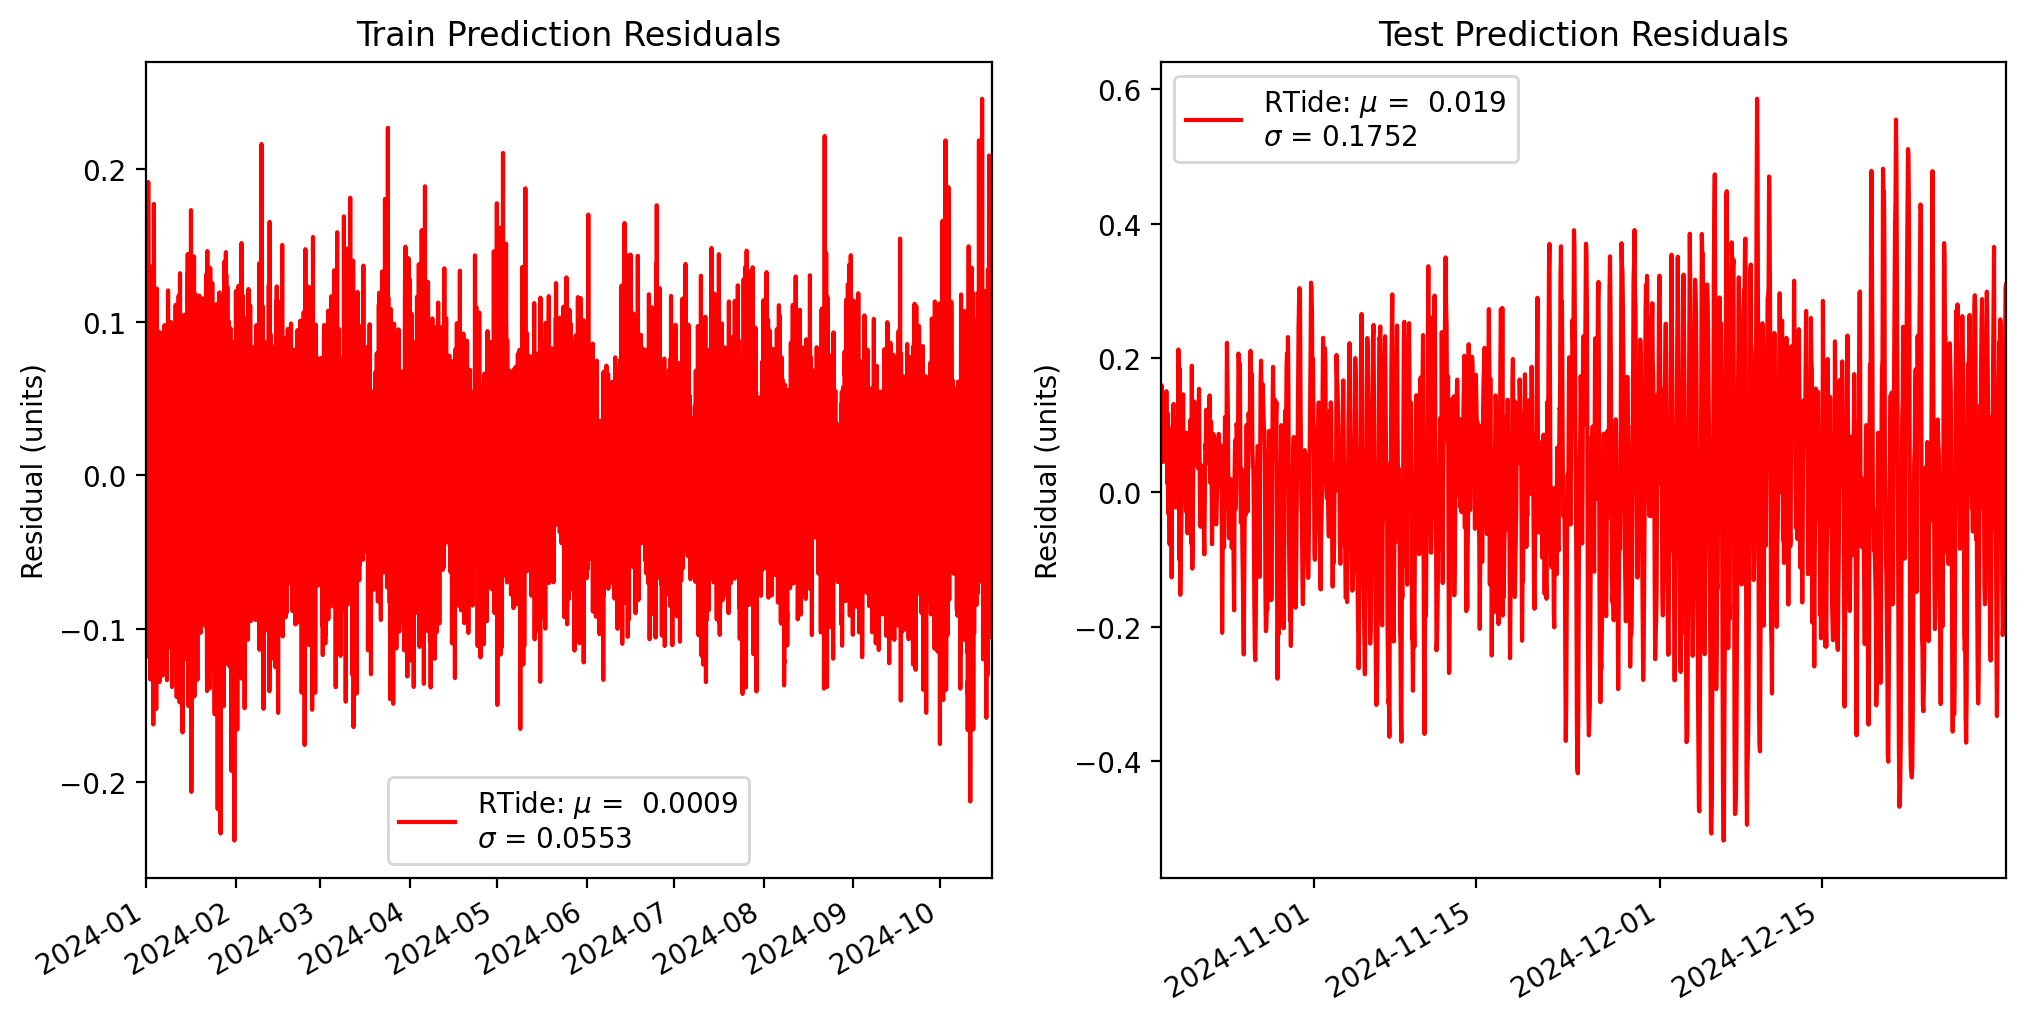

In [18]:
model.Visualize_Residuals(tides = False)

Train Results
r2: 0.9992242239532262 MSE: 0.003062520679897179 MAE : 0.04334833548071049 MAPE : 0.14528238016353742
Test Results
r2: 0.9919966406253071 MSE: 0.031064864481234685 MAE : 0.13988138033472364 MAPE : 0.2894769104154532


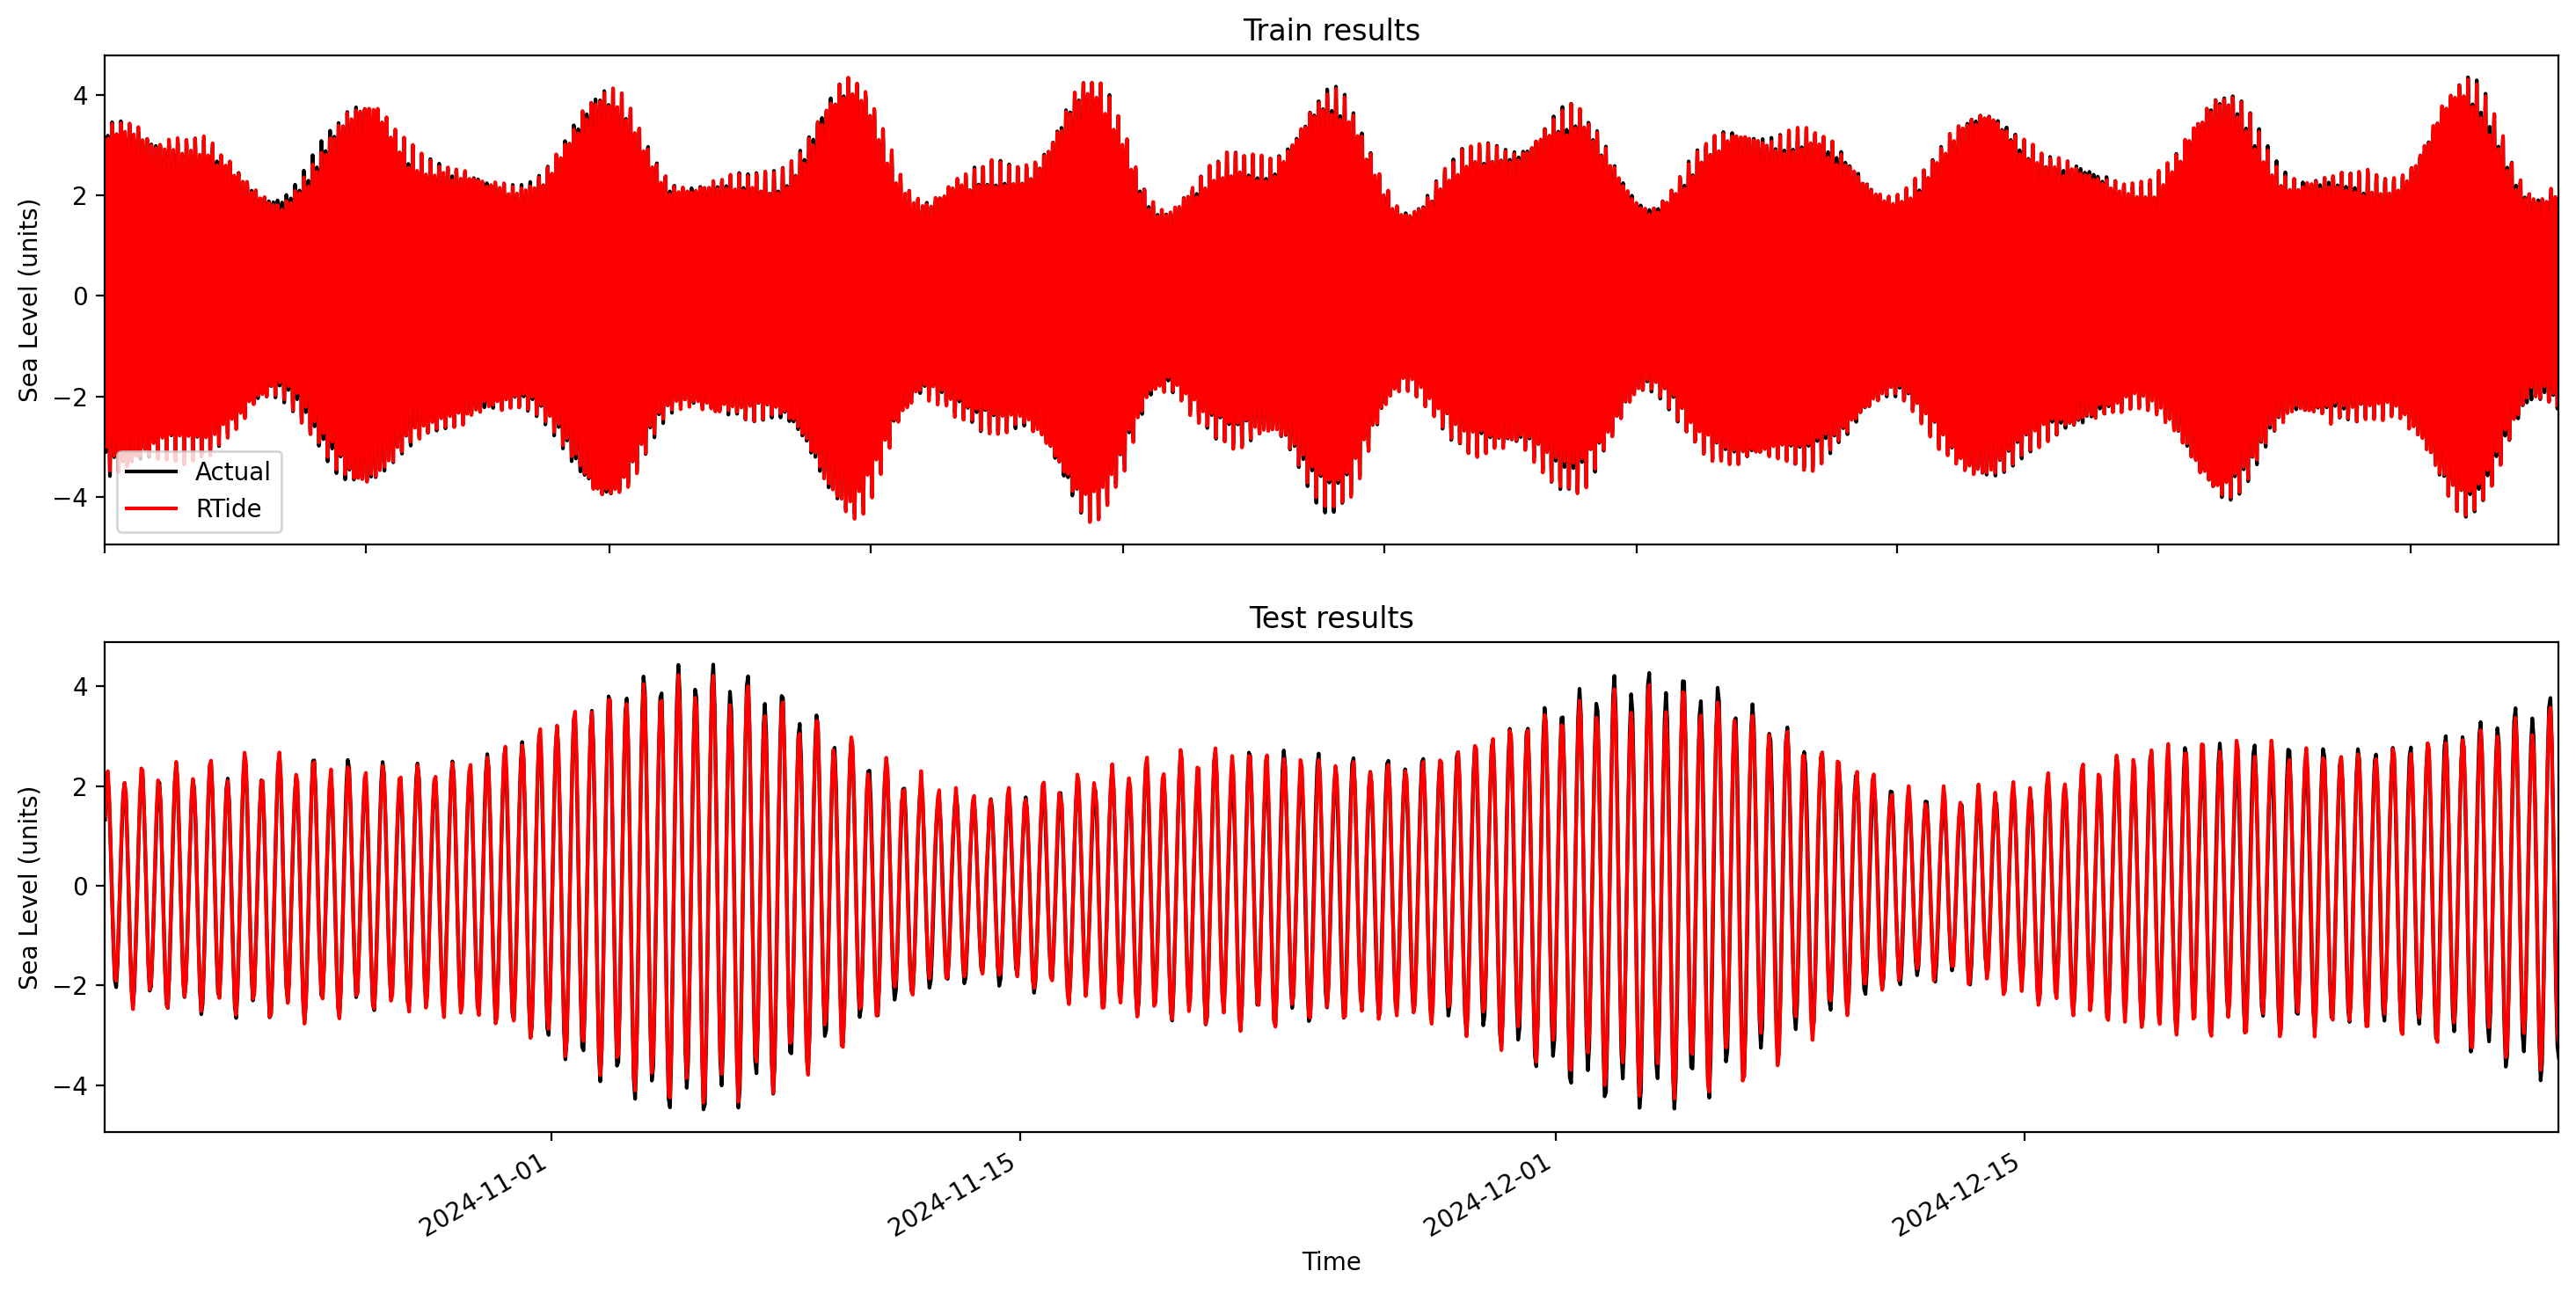

In [19]:
model.Visualize_Predictions()

### Non-tidal Forcing

Far more interesting than a pure tidal signal is one contaminated by non-tidal forcing. Here, we show how RTide can be employed to efficiently study these effects and generate predictions. In particular we look at a signal contaminated by an external surge, and want to predict both the true tidal signal and the nonlinear tide-surge response. A simple approximation for this behavior is given by:


$\zeta(t) = \zeta_T + \zeta_S + A\times\zeta_S(\zeta_T ' + \zeta_T '')$

#### Create Surge Signal

In [30]:
def add_white_noise(signal, snr_dB):
    """
    Helper function to add white gaussian noise at specified snr_dB.
    """
    # Extract the portion of the signal to add noise to
    original_signal = signal

    # Calculate the power of the original signal
    original_power = np.mean(original_signal**2)

    # Calculate the noise power based on the desired SNR (in linear scale)
    snr_linear = 10**(snr_dB / 10.0)
    noise_power = original_power / snr_linear

    # Generate white noise with the same length as the original signal
    noise = np.random.normal(0, np.sqrt(noise_power), len(original_signal))

    # Add the noise to the original signal
    noisy_signal = original_signal + noise

    return noisy_signal

import random

def random_indices_within_chunks(lst, x, l):
    """
    Randomly select indices within chunks of a list, excluding l indices from both ends.

    Parameters:
    - lst: The input list.
    - x: The length of each chunk.
    - l: The number of excluded indices from both ends of each chunk.

    Returns:
    - A list of randomly selected indices.
    """
    indices = []
    chunk_start = 0
    seed_val = 0
    while chunk_start < len(lst):
        chunk_end = min(chunk_start + x, len(lst))
        valid_indices = list(range(chunk_start + l, chunk_end - l))

        if valid_indices:
            random.seed(seed_val)
            random_index = random.choice(valid_indices)
            indices.append(random_index)
            seed_val+=1
        chunk_start = chunk_end

    return indices
## Tide
times = pd.date_range(start = '2024-01-01 00:00:00+00:00', periods=24*365, freq="1H",tz='UTC')
time_vals = times.to_julian_date().to_numpy()

### Computing the contribution of each constituent
individual_tides = []
for i,j in enumerate(constit_freqs):
    individual_tides.append(amplitudes[i]*np.cos(24*j*np.array(time_vals) * 2 * np.pi + (phases[i] *np.pi /180)))

tide = np.sum(individual_tides, axis = 0)
## Surges
surge_min = 0.1
surge_max = 1
surge_duration_min = 0.25
surge_duration_max = 4

np.random.seed(45) ### Using same seed for consistency
surge_duration = [np.random.uniform(surge_duration_min,surge_duration_max) for i in range(26)]
np.random.seed(46) ### Using same seed for consistency
surge_intensity= [np.random.uniform(surge_min,surge_max) for i in range(26)]

surges = [surge_intensity[i]*(1 - np.cos(24*2*np.pi*np.arange(0,surge_duration[i], 0.041666666666666664)/(surge_duration[i]*24))) for i in range(len(surge_duration))]

### Tide-Surge Function
first_derivative = np.gradient(tide)
second_derivative = np.gradient(np.gradient(tide))
indices = np.where((first_derivative > 0) & (second_derivative > 0))[0]
mults = np.zeros(len(tide))
mults[indices] = 1
window_size = 4
smooth_mults = 0.33*(first_derivative+ second_derivative)
smooth_mults_test = np.zeros(len(tide))

random_indices = random_indices_within_chunks(tide, 14*24, 96)

mod_tide = tide.copy()
for i,surge in enumerate(surges):
  for xval in range(len(surge)):
    mod_tide[xval+random_indices[i]] += surge[xval]
    smooth_mults_test[xval+random_indices[i]] = smooth_mults[xval + random_indices[i]] * surge[xval]

observations = mod_tide + smooth_mults_test ## Tide + Surge + tide-surge
surge = mod_tide - tide

observations = add_white_noise(observations, 100)

surge_df = pd.DataFrame({'observations': observations, 'surge': surge}, index = times)

#### Plotting

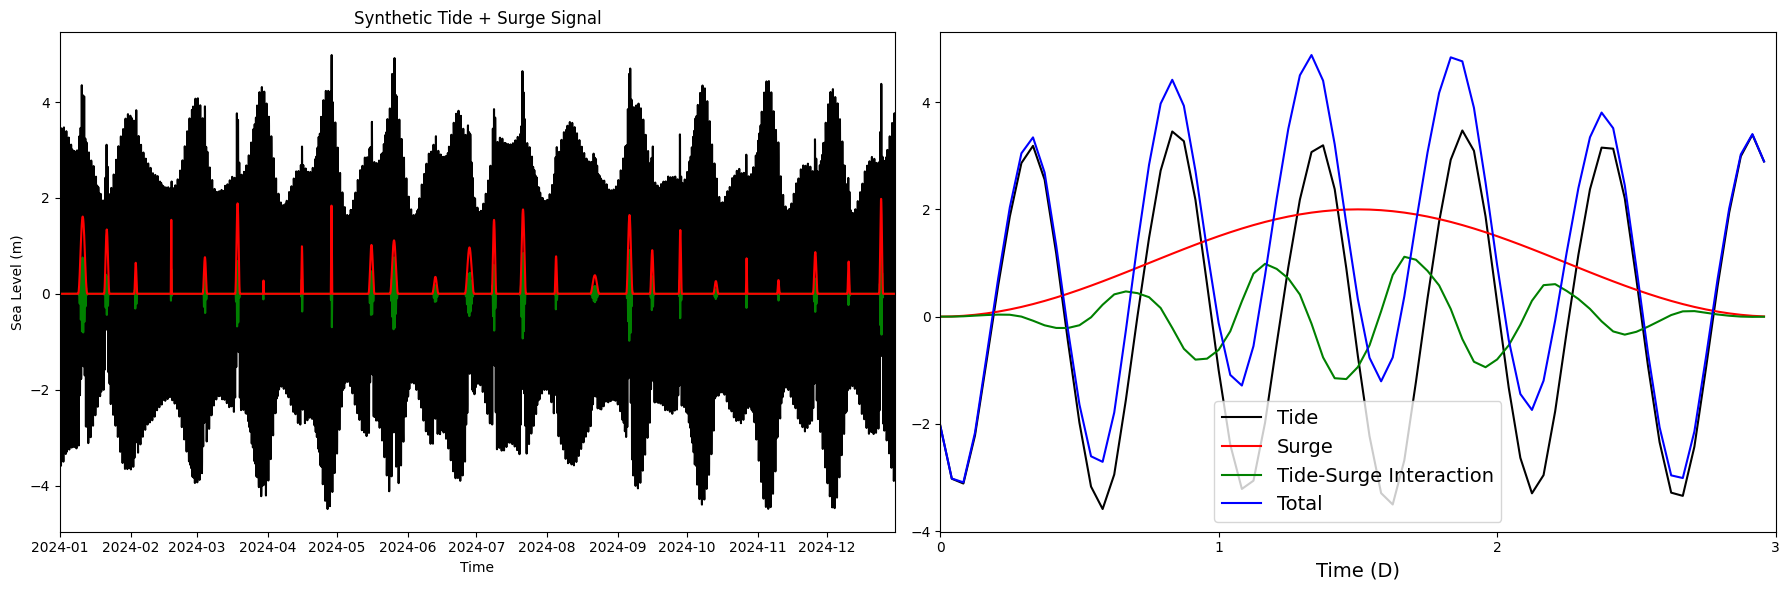

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df, df2, and tide are defined somewhere in your code
# First subplot
fig = plt.figure(figsize=(18, 6))  # Adjust the width and height as needed

plt.subplot(1, 2, 1)

plt.plot(surge_df.index, surge_df.observations, label = 'observations', color = 'black')
plt.plot(surge_df.index, smooth_mults_test, label = 'tide-surge', color = 'green')
plt.plot(surge_df.index, surge_df.surge, label = 'surge', color = 'red')
plt.ylabel('Sea Level (m)')
plt.xlabel('Time')
plt.xlim(surge_df.index[0], surge_df.index[-1])
plt.title("Synthetic Tide + Surge Signal")

# Second subplot
plt.subplot(1, 2, 2)
plt.plot(tide[:72 ], label='Tide', color='k')
surge2 = (1 - np.cos(24 * 2 * np.pi * np.arange(0, 3, 0.041666666666666664) / (72)))
plt.plot(surge2, label='Surge', color='red')
surge3 = (1 - np.cos(24 * 2 * np.pi * np.arange(0, 365, 0.041666666666666664) / (72)))
window_size = 7
smooth_mults2 = np.convolve(mults, np.ones(window_size) / window_size, mode='same')
# Adjust the range of smoothed values to be between 0 and 1
smooth_vals = smooth_mults2 + 0.1
first_derivative1 = np.gradient(tide)
second_derivative1 = np.gradient(np.gradient(tide))
plt.plot(surge3[:72 ] * 0.33 * (first_derivative1 + second_derivative1)[:72 ],
         label='Tide-Surge Interaction', color='green')
total = tide[:72 ] + surge3[:72 ] + surge3[:72 ] * 0.33 * (first_derivative1 + second_derivative1)[:72 ]
plt.plot(total, label='Total', color='blue')
plt.xlim(0, 72 )
plt.xticks([0,24, 48, 72], [0, 1, 2, 3])
plt.xlabel('Time (D)', fontsize = 14)

plt.legend(fontsize = 14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Running Response
Multivariate inputs are simply included as an additional column in the input dataframe. It still only takes three lines of code to build and train a model for any number of multivariate inputs!

In [32]:
surge_df = pd.DataFrame({'observations': observations, 'surge': surge}, index = times)

model = RTide(surge_df, lat = 44.9062, lon = -66.996201)

model.Prepare_Inputs(symmetrical = True, multivariate_lags = 'negative', path = 'surge')

Input function path either has not specified, has not yet been computed, or different inputs were provided. Computing now...
Actual error was Length mismatch: Expected axis has 87600 elements, new values have 8760 elements


100%|██████████| 9060/9060 [02:43<00:00, 55.34it/s]


#### Model Overview ####
Learning Rate: 0.0001
Loss: MSE
Linear Epochs: 0
Standard Epochs: 500
Regularization: 0.001
Number of Layers: 3
Multi: True
Save Weights: True
Epoch 1/500
229/229 - 3s - loss: 1.4236 - val_loss: 0.7191 - lr: 1.0000e-04 - 3s/epoch - 12ms/step
Epoch 2/500
229/229 - 1s - loss: 0.6617 - val_loss: 0.6246 - lr: 1.0000e-04 - 1s/epoch - 6ms/step
Epoch 3/500
229/229 - 1s - loss: 0.5973 - val_loss: 0.5792 - lr: 1.0000e-04 - 1s/epoch - 6ms/step
Epoch 4/500
229/229 - 1s - loss: 0.5573 - val_loss: 0.5918 - lr: 1.0000e-04 - 792ms/epoch - 3ms/step
Epoch 5/500
229/229 - 1s - loss: 0.5419 - val_loss: 0.5528 - lr: 1.0000e-04 - 773ms/epoch - 3ms/step
Epoch 6/500
229/229 - 1s - loss: 0.5250 - val_loss: 0.5294 - lr: 1.0000e-04 - 835ms/epoch - 4ms/step
Epoch 7/500
229/229 - 1s - loss: 0.5094 - val_loss: 0.5037 - lr: 1.0000e-04 - 808ms/epoch - 4ms/step
Epoch 8/500
229/229 - 1s - loss: 0.5012 - val_loss: 0.5002 - lr: 1.0000e-04 - 785ms/epoch - 3ms/step
Epoch 9/500
229/229 - 1s - loss:

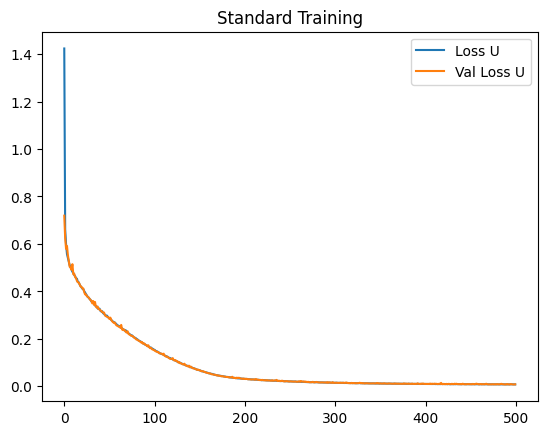

270/270 [==============================] - 1s 2ms/step


In [33]:
surge_inputs = {
    'regularization_strength': 0.001,
    'loss' : 'MSE',
    'save_weights' : True,
    'lr':1e-4,
    'standard_epochs': 500
}
model.Train(**surge_inputs)

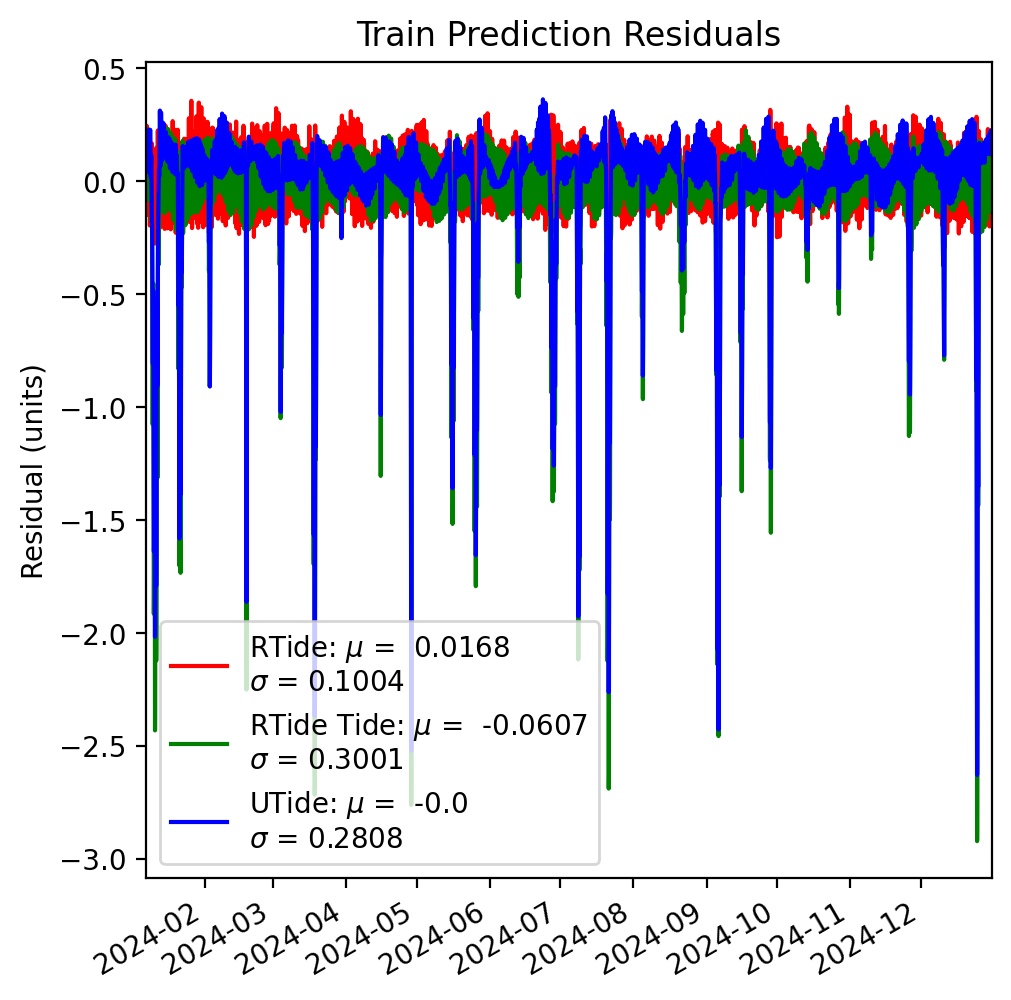

In [34]:
model.Visualize_Residuals(tides = True)

Train Results
r2: 0.9974125716065038 MSE: 0.010361763763139402 MAE : 0.08226278022595356 MAPE : 0.16885548767343156


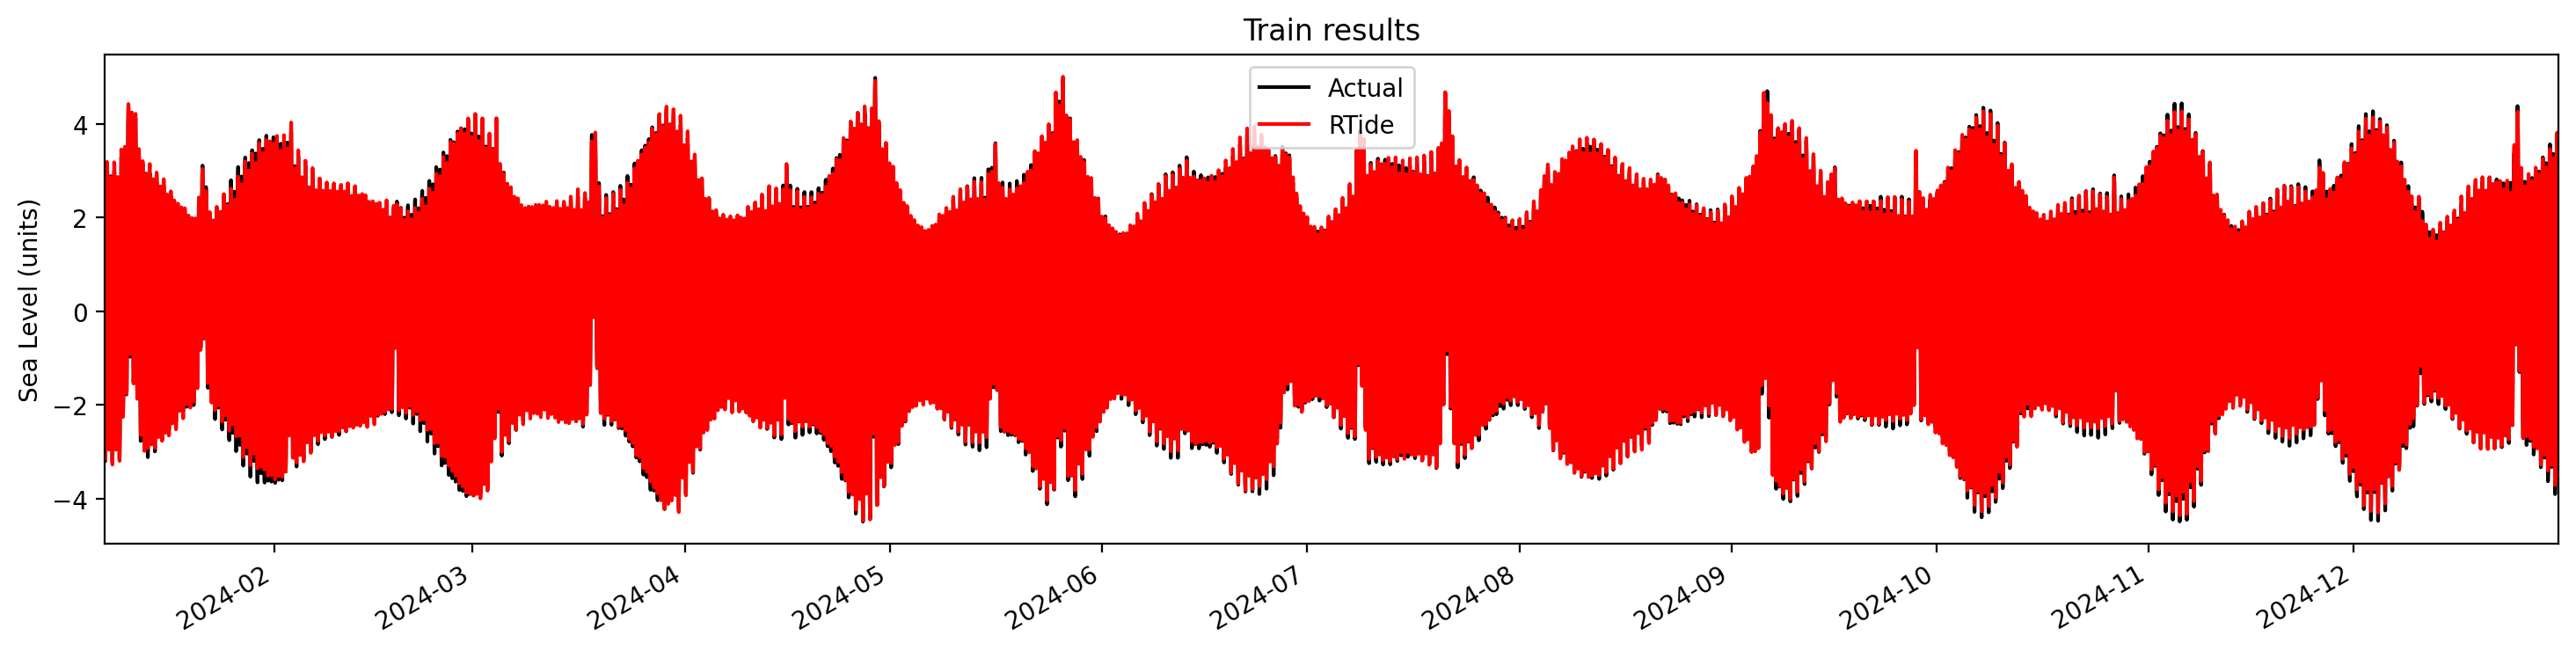

In [36]:
model.Visualize_Predictions()

In [40]:
model.Predict(surge_df[8000:])

Computing input functions for prediction
Input function path either has not specified, has not yet been computed, or different inputs were provided. Computing now...
Actual error was exceptions must derive from BaseException


100%|██████████| 1060/1060 [00:19<00:00, 53.26it/s]


20/20 [==============================] - 0s 2ms/step


Train Results
r2: 0.9974125716065038 MSE: 0.010361763763139402 MAE : 0.08226278022595356 MAPE : 0.16885548767343156
Test Results
r2: 0.9964937326684937 MSE: 0.013223512538583584 MAE : 0.09438909033131855 MAPE : 0.20450088144568407


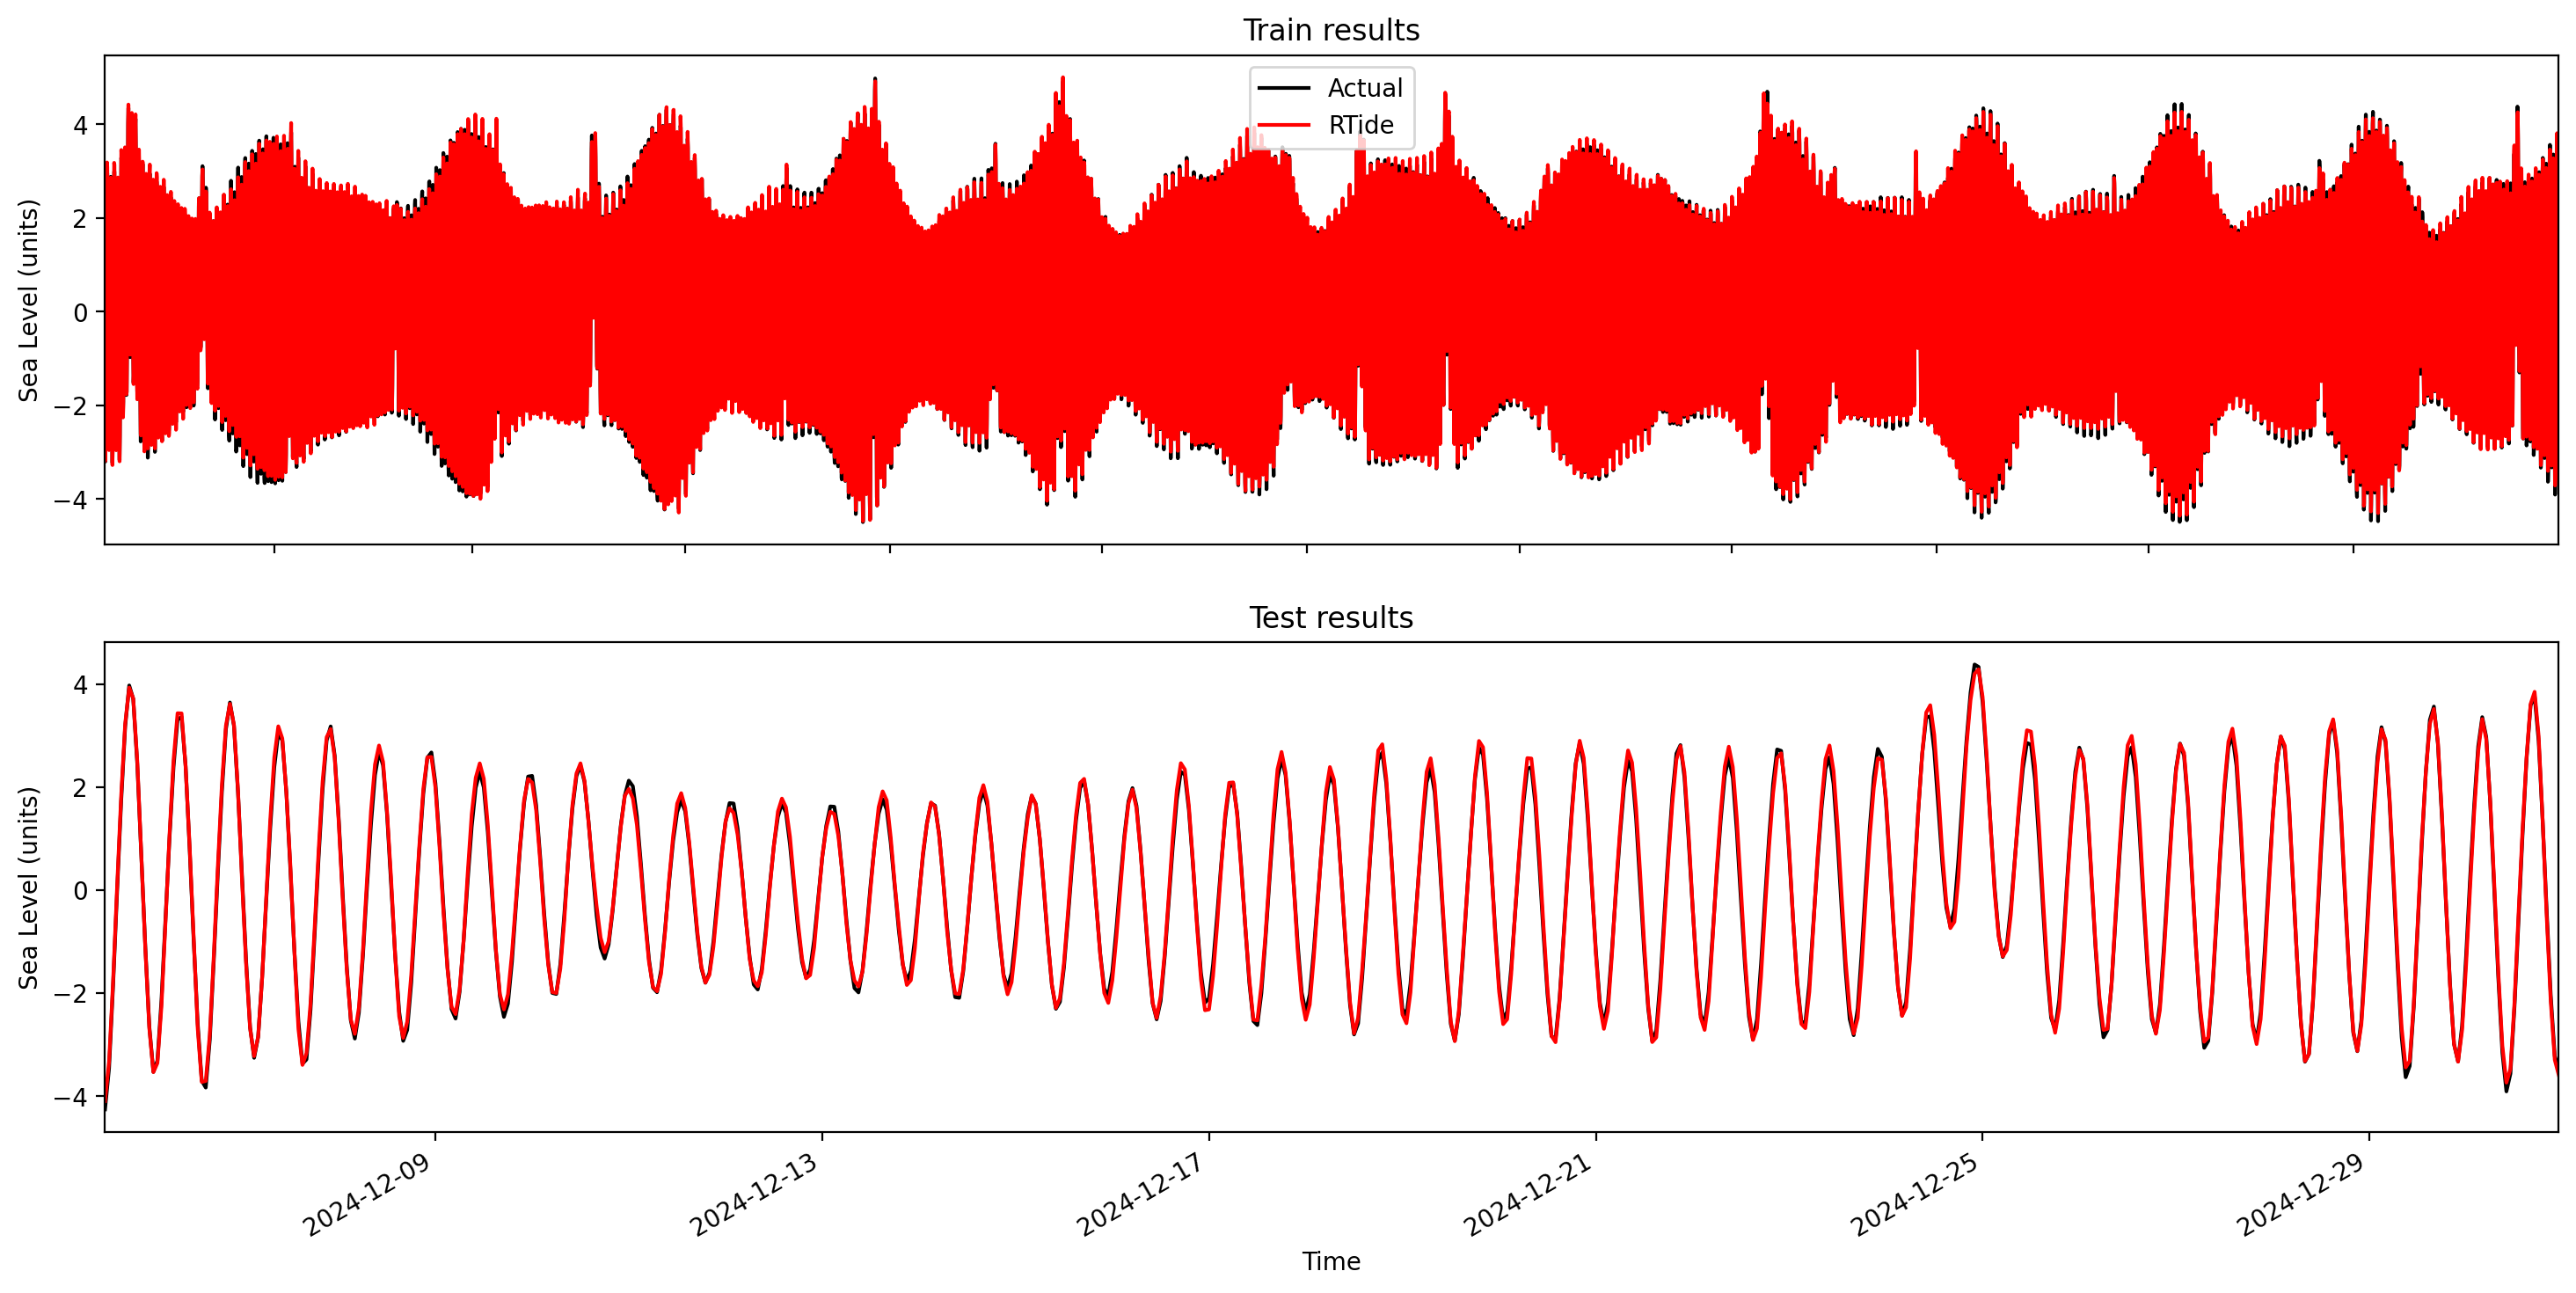

In [42]:
model.Visualize_Predictions()

Note that because we are using multivariate_lags for the surge signal, inspection of the SHAP values for the real-time surge will not paint the complete picture.

1/1 [==============================] - 0s 26ms/step


  0%|          | 0/610 [00:00<?, ?it/s]

141/141 [==============================] - 0s 3ms/step


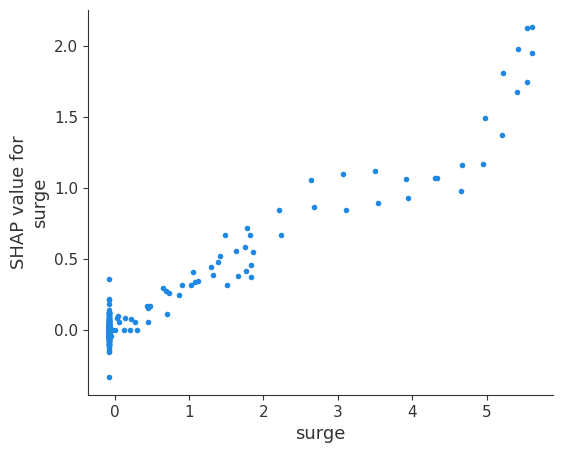

In [41]:
model.Shap_Analysis()

### Comparing Derived Harmonics:

In [43]:
#### Helper Function for Computing
def constit_RMS(model_amplitudes, model_phases, HA_amplitudes, HA_phases, IRLS_amplitudes, IRLS_phases, actual_amplitudes, actual_phases, stat_type = 'Amplitude'):
  tvals = np.linspace(0,2*np.pi,1000)
  HA_errs = []
  RT_errs = []
  IRLS_errs = []
  for i,const in enumerate(constits):
    print(f"Computing {stat_type} errors")
    if stat_type == 'RMS':
      RTide_errors = np.sqrt(((model_amplitudes[i]*np.cos(tvals + (model_phases[i]*np.pi/180)) - actual_amplitudes[i]*np.cos(tvals + (actual_phases[i]*np.pi/180))))**2)
      HA_errors = np.sqrt(((HA_amplitudes[i]*np.cos(tvals + (HA_phases[i]*np.pi/180)) - actual_amplitudes[i]*np.cos(tvals + (actual_phases[i]*np.pi/180))))**2)
      IRLS_errors = np.sqrt(((IRLS_amplitudes[i]*np.cos(tvals + (IRLS_phases[i]*np.pi/180)) - actual_amplitudes[i]*np.cos(tvals + (actual_phases[i]*np.pi/180))))**2)
    elif stat_type == 'Amplitude':
      RTide_errors = abs(model_amplitudes[i] - actual_amplitudes[i])
      HA_errors = abs(HA_amplitudes[i] - actual_amplitudes[i])
      IRLS_errors = abs(IRLS_amplitudes[i] - actual_amplitudes[i])
    else:
      RTide_errors = abs(model_phases[i] - actual_phases[i])
      HA_errors = abs(HA_phases[i] - actual_phases[i])
      IRLS_errors = abs(IRLS_phases[i] - actual_phases[i])

    RT_errs.append(np.average(RTide_errors))
    HA_errs.append(np.average(HA_errors))
    IRLS_errs.append(np.average(IRLS_errors))
    print(f'{const}: RTide {round(np.average(RTide_errors),6)}')
    print(f'{const}: HA    {round(np.average(HA_errors),6)}')
    print(f'{const}: IRLS    {round(np.average(IRLS_errors),6)}')
  print(f"RSS RTide Error: {np.sqrt(np.sum(np.array(RT_errs)**2))}")
  print(f"RSS OLS Error: {np.sqrt(np.sum(np.array(HA_errs)**2))}")
  print(f"RSS IRLS Error: {np.sqrt(np.sum(np.array(IRLS_errs)**2))}")

def constit_RMS_latex(model_amplitudes, model_phases, HA_amplitudes, HA_phases, IRLS_amplitudes, IRLS_phases, actual_amplitudes, actual_phases, stat_type='Amplitude'):
    import numpy as np

    tvals = np.linspace(0, 2 * np.pi, 1000)
    HA_errs = []
    RT_errs = []
    IRLS_errs = []
    latex_rows = []

    for i, const in enumerate(constits):
        if stat_type == 'RMS':
            RTide_errors = np.sqrt(
                ((model_amplitudes[i] * np.cos(tvals + (model_phases[i] * np.pi / 180)) -
                  actual_amplitudes[i] * np.cos(tvals + (actual_phases[i] * np.pi / 180)))) ** 2)
            HA_errors = np.sqrt(
                ((HA_amplitudes[i] * np.cos(tvals + (HA_phases[i] * np.pi / 180)) -
                  actual_amplitudes[i] * np.cos(tvals + (actual_phases[i] * np.pi / 180)))) ** 2)
            IRLS_errors = np.sqrt(
                ((IRLS_amplitudes[i] * np.cos(tvals + (IRLS_phases[i] * np.pi / 180)) -
                  actual_amplitudes[i] * np.cos(tvals + (actual_phases[i] * np.pi / 180)))) ** 2)
        elif stat_type == 'Amplitude':
            RTide_errors = abs(model_amplitudes[i] - actual_amplitudes[i])
            HA_errors = abs(HA_amplitudes[i] - actual_amplitudes[i])
            IRLS_errors = abs(IRLS_amplitudes[i] - actual_amplitudes[i])
        else:
            RTide_errors = abs(model_phases[i] - actual_phases[i])
            HA_errors = abs(HA_phases[i] - actual_phases[i])
            IRLS_errors = abs(IRLS_phases[i] - actual_phases[i])

        RT_avg_error = np.average(RTide_errors)
        HA_avg_error = np.average(HA_errors)
        IRLS_avg_error = np.average(IRLS_errors)

        RT_errs.append(RT_avg_error)
        HA_errs.append(HA_avg_error)
        IRLS_errs.append(IRLS_avg_error)

        latex_rows.append(f"{const} & {RT_avg_error:.6f} & {HA_avg_error:.6f} & {IRLS_avg_error:.6f} \\\\")

    rss_RT_err = np.sqrt(np.sum(np.array(RT_errs) ** 2))
    rss_HA_err = np.sqrt(np.sum(np.array(HA_errs) ** 2))
    rss_IRLS_err = np.sqrt(np.sum(np.array(IRLS_errs) ** 2))

    latex_table = "\\begin{table}[h!]\n"
    latex_table += "\\centering\n"
    latex_table += "\\begin{tabular}{lccc}\n"
    latex_table += "\\toprule\n"
    latex_table += "Constituent & RTide Error & HA Error & IRLS Error \\\\\n"
    latex_table += "\\midrule\n"
    latex_table += "\n".join(latex_rows) + "\n"
    latex_table += "\\bottomrule\n"
    latex_table += "\\end{tabular}\n"
    latex_table += "\\caption{Errors for different constituents and methods}\n"
    latex_table += "\\end{table}\n"

    rss_latex_table = "\\begin{table}[h!]\n"
    rss_latex_table += "\\centering\n"
    rss_latex_table += "\\begin{tabular}{lc}\n"
    rss_latex_table += "\\toprule\n"
    rss_latex_table += "Method & RSS Error \\\\\n"
    rss_latex_table += "\\midrule\n"
    rss_latex_table += f"RTide & {rss_RT_err:.6f} \\\\\n"
    rss_latex_table += f"HA & {rss_HA_err:.6f} \\\\\n"
    rss_latex_table += f"IRLS & {rss_IRLS_err:.6f} \\\\\n"
    rss_latex_table += "\\bottomrule\n"
    rss_latex_table += "\\end{tabular}\n"
    rss_latex_table += "\\caption{Root Sum of Squares (RSS) Errors}\n"
    rss_latex_table += "\\end{table}\n"

    print(latex_table)
    print(rss_latex_table)


In [44]:
### Obtaining constituents from RTide
RTide_amplitudes = model.rtide_ha['A']
RTide_phases = model.rtide_ha['g']

HA_amplitudes = model.utide_ha['A']
HA_phases = model.utide_ha['g']


HA_IRLS_amplitudes = model.utide_irls['A']
HA_IRLS_phases = model.utide_irls['g']

### Printing results
constit_RMS_latex(RTide_amplitudes, RTide_phases, HA_amplitudes, HA_phases, HA_IRLS_amplitudes,HA_IRLS_phases, amplitudes, phases, stat_type = 'RMS')

\begin{table}[h!]
\centering
\begin{tabular}{lccc}
\toprule
Constituent & RTide Error & HA Error & IRLS Error \\
\midrule
M2 & 2.578036 & 2.589400 & 2.582716 \\
N2 & 0.668823 & 0.679207 & 0.683986 \\
S2 & 0.024202 & 0.030258 & 0.035900 \\
L2 & 0.086648 & 0.092647 & 0.091008 \\
K1 & 0.155812 & 0.089880 & 0.086946 \\
NU2 & 0.135400 & 0.041388 & 0.036263 \\
O1 & 0.042777 & 0.042152 & 0.039547 \\
K2 & 0.111547 & 0.100101 & 0.110835 \\
2N2 & 0.008359 & 0.022424 & 0.011731 \\
M4 & 0.027502 & 0.027694 & 0.028726 \\
LDA2 & 0.065735 & 0.049244 & 0.049504 \\
P1 & 0.061395 & 0.063776 & 0.066402 \\
M6 & 0.037028 & 0.040752 & 0.020457 \\
2MN6 & 0.023657 & 0.013932 & 0.002856 \\
SSA & 0.033250 & 0.010762 & 0.022679 \\
MM & 0.013610 & 0.027470 & 0.018835 \\
MN4 & 0.031982 & 0.035621 & 0.023482 \\
2MS6 & 0.003516 & 0.033018 & 0.029157 \\
Q1 & 0.007573 & 0.032260 & 0.018842 \\
MS4 & 0.013585 & 0.026494 & 0.018965 \\
OQ2 & 0.003385 & 0.023070 & 0.020569 \\
MF & 0.016185 & 0.013960 & 0.002830 \\
EPS2 & 0